# Classification for Choropleth Mapping

- Level: Novice
- Duration: 2 hours
- Contributors: Serge Rey (srey@asu.edu); Jon Reades (jonathan.reades@kcl.ac.uk)
- Keywords: choropleth; mapping; visualization; pysal; classifiers

## Introduction

* what is classification
* role in choropleth mapping
* explore classification using PySAL

In [3]:
import pysal.lib as ps

## Data Set: Mexico State Gross Domestic Product

In [4]:
ps.examples.available()

['south',
 'wmat',
 'stl',
 'taz',
 'tokyo',
 'georgia',
 'nyc_bikes',
 'calemp',
 'snow_maps',
 '__pycache__',
 'tests',
 'networks',
 '10740',
 'guerry',
 'Polygon',
 'nat',
 'book',
 'desmith',
 'virginia',
 'chicago',
 'berlin',
 'street_net_pts',
 'burkitt',
 'Polygon_Holes',
 'columbus',
 'mexico',
 'newHaven',
 '__pycache__',
 'baltim',
 'Point',
 'clearwater',
 'arcgis',
 '__pycache__',
 'sacramento2',
 'Line',
 'juvenile',
 'us_income',
 'geodanet',
 'sids2',
 'rio_grande_do_sul']

In [5]:
ps.examples.explain('mexico')

{'name': 'mexico',
 'description': 'Decennial per capita incomes of Mexican states 1940-2000',
 'explanation': ['* mexico.csv: attribute data. (n=32, k=13)',
  '* mexico.gal: spatial weights in GAL format.',
  '* mexicojoin.shp: Polygon shapefile. (n=32)',
  'Data used in Rey, S.J. and M.L. Sastre Gutierrez. (2010) "Interregional inequality dynamics in Mexico." Spatial Economic Analysis, 5: 277-298.']}

In [7]:
f = ps.io.open(ps.examples.get_path('mexico.csv'))
f.header

['State',
 'pcgdp1940',
 'pcgdp1950',
 'pcgdp1960',
 'pcgdp1970',
 'pcgdp1980',
 'pcgdp1990',
 'pcgdp2000',
 'hanson03',
 'hanson98',
 'esquivel99',
 'inegi',
 'inegi2']

In [8]:
y = f.by_col_array('pcgdp2000')

In [9]:
y

array([[27782.],
       [29855.],
       [26103.],
       [36163.],
       [ 8684.],
       [30735.],
       [28460.],
       [21358.],
       [54349.],
       [17379.],
       [15585.],
       [11820.],
       [12348.],
       [21610.],
       [16322.],
       [11838.],
       [18170.],
       [11478.],
       [38672.],
       [ 9010.],
       [15685.],
       [26149.],
       [33442.],
       [15866.],
       [15242.],
       [24068.],
       [13360.],
       [23546.],
       [11701.],
       [12191.],
       [17509.],
       [11130.]])

### Numerical summaries

#### Sample Mean

$\bar{y} = \sum_{i=1}^n y_i$

In [10]:
y_mean = y.mean()
y_mean

20862.8125

#### Sample Standard Deviation

$\hat{\sigma} = \sqrt{\frac{\sum_{i=1}^n (y_i-\bar{y})^2}{n-1}}$

In [11]:
y_std = y.std()
y_std

10114.446813338027

#### Median

In [12]:
import numpy as np
y_median = np.median(y)
y_median

17444.0

In [13]:
(y < y_mean).sum()

18

In [14]:
(y > y_mean).sum()

14

In [15]:
y_sorted = np.sort(y, axis=0)
y_sorted

array([[ 8684.],
       [ 9010.],
       [11130.],
       [11478.],
       [11701.],
       [11820.],
       [11838.],
       [12191.],
       [12348.],
       [13360.],
       [15242.],
       [15585.],
       [15685.],
       [15866.],
       [16322.],
       [17379.],
       [17509.],
       [18170.],
       [21358.],
       [21610.],
       [23546.],
       [24068.],
       [26103.],
       [26149.],
       [27782.],
       [28460.],
       [29855.],
       [30735.],
       [33442.],
       [36163.],
       [38672.],
       [54349.]])

In [16]:
y_sorted[15]

array([17379.])

In [17]:
y_sorted[16]

array([17509.])

In [18]:
(y_sorted[15]+y_sorted[16])/2.

array([17444.])

### Univariate Distribution Visualization

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


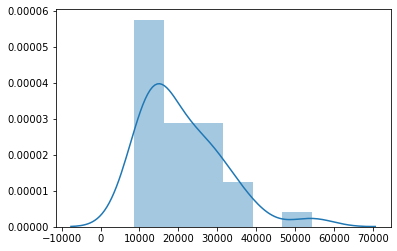

In [19]:
%pylab inline
import seaborn as sns
sns.distplot(y)

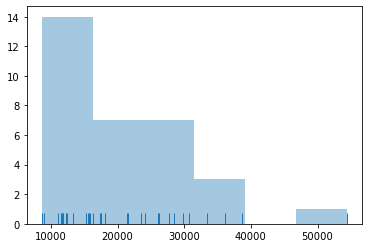

In [20]:
sns.distplot(y, kde=False, rug=True)

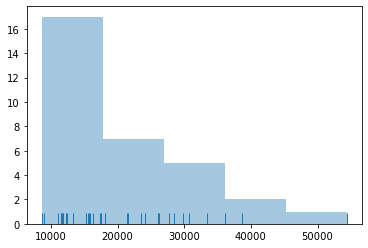

In [21]:
sns.distplot(y, bins=5, kde=False, rug=True)

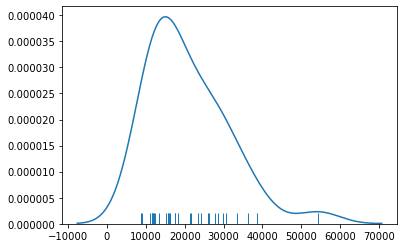

In [22]:
sns.distplot(y, hist=False,  rug=True)

## PySAL Classifiers

### Quantiles

In [24]:
from pysal.viz import mapclassify as mc

In [25]:
q5 = mc.Quantiles(y)

In [26]:
q5

                  Quantiles                  
 
  Lower              Upper              Count
            x[i] <= 11908.600               7
11908.600 < x[i] <= 15757.400               6
15757.400 < x[i] <= 21509.200               6
21509.200 < x[i] <= 28324.400               6
28324.400 < x[i] <= 54349.000               7

In [27]:
dir(q5)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_classify',
 '_set_bins',
 '_summary',
 '_table_string',
 '_update',
 'adcm',
 'bins',
 'classes',
 'counts',
 'find_bin',
 'gadf',
 'get_adcm',
 'get_gadf',
 'get_tss',
 'k',
 'make',
 'name',
 'plot',
 'tss',
 'update',
 'y',
 'yb']

In [28]:
q5.yb

array([3, 4, 3, 4, 0, 4, 4, 2, 4, 2, 1, 0, 1, 3, 2, 0, 2, 0, 4, 0, 1, 3,
       4, 2, 1, 3, 1, 3, 0, 1, 2, 0])

In [29]:
q5.adcm

73562.0

In [30]:
q4 = mc.Quantiles(y, k=4)
q4

                  Quantiles                  
 
  Lower              Upper              Count
            x[i] <= 12308.750               8
12308.750 < x[i] <= 17444.000               8
17444.000 < x[i] <= 26557.250               8
26557.250 < x[i] <= 54349.000               8

### Equal Interval

In [31]:
ei = mc.Equal_Interval(y, k=5)
ei

/opt/conda/lib/python3.7/site-packages/pysal/viz/mapclassify/classifiers.py:482: UserWarning: Deprecated (2.1.0): Equal_Interval is being renamed to EqualInterval. Equal_Interval will be removed on 2020-01-31.
  warn(self.message)


                Equal Interval                
 
  Lower              Upper               Count
            x[i] <= 17817.000               17
17817.000 < x[i] <= 26950.000                7
26950.000 < x[i] <= 36083.000                5
36083.000 < x[i] <= 45216.000                2
45216.000 < x[i] <= 54349.000                1

### Maximum Breaks

In [32]:
mb = mc.Maximum_Breaks(y, k=5)
mb

/opt/conda/lib/python3.7/site-packages/pysal/viz/mapclassify/classifiers.py:482: UserWarning: Deprecated (2.1.0): Maximum_Breaks is being renamed to MaximumBreaks. Maximum_Breaks will be removed on 2020-01-31.
  warn(self.message)


                MaximumBreaks                 
 
  Lower              Upper               Count
            x[i] <= 19764.000               18
19764.000 < x[i] <= 32088.500               10
32088.500 < x[i] <= 34802.500                1
34802.500 < x[i] <= 46510.500                2
46510.500 < x[i] <= 54349.000                1

### Box Plot

In [33]:
bp = mc.Box_Plot(y)
bp

/opt/conda/lib/python3.7/site-packages/pysal/viz/mapclassify/classifiers.py:482: UserWarning: Deprecated (2.1.0): Box_Plot is being renamed to BoxPlot. Box_Plot will be removed on 2020-01-31.
  warn(self.message)


                   Box Plot                  
 
  Lower              Upper              Count
            x[i] <= -9064.000               0
-9064.000 < x[i] <= 12308.750               8
12308.750 < x[i] <= 17444.000               8
17444.000 < x[i] <= 26557.250               8
26557.250 < x[i] <= 47930.000               7
47930.000 < x[i] <= 54349.000               1

### Standard Deviation

In [34]:
sd = mc.Std_Mean(y)
sd

/opt/conda/lib/python3.7/site-packages/pysal/viz/mapclassify/classifiers.py:482: UserWarning: Deprecated (2.1.0): Std_Mean is being renamed to StdMean. Std_Mean will be removed on 2020-01-31.
  warn(self.message)


                   StdMean                    
 
  Lower              Upper               Count
            x[i] <=   310.236                0
  310.236 < x[i] <= 10586.524                2
10586.524 < x[i] <= 31139.101               26
31139.101 < x[i] <= 41415.389                3
41415.389 < x[i] <= 54349.000                1

### Head Tail

In [35]:
ht = mc.HeadTail_Breaks(y) # need to change import structure
ht

/opt/conda/lib/python3.7/site-packages/pysal/viz/mapclassify/classifiers.py:482: UserWarning: Deprecated (2.1.0): HeadTail_Breaks is being renamed to HeadTailBreaks. HeadTail_Breaks will be removed on 2020-01-31.
  warn(self.message)
/opt/conda/lib/python3.7/site-packages/pysal/viz/mapclassify/classifiers.py:86: DeprecationWarning: Call to deprecated function (or staticmethod) headTail_breaks. (use head_tail_breaks)
  return headTail_breaks(values[values >= mean], cuts)
/opt/conda/lib/python3.7/site-packages/pysal/viz/mapclassify/classifiers.py:86: DeprecationWarning: Call to deprecated function (or staticmethod) headTail_breaks. (use head_tail_breaks)
  return headTail_breaks(values[values >= mean], cuts)
/opt/conda/lib/python3.7/site-packages/pysal/viz/mapclassify/classifiers.py:86: DeprecationWarning: Call to deprecated function (or staticmethod) headTail_breaks. (use head_tail_breaks)
  return headTail_breaks(values[values >= mean], cuts)


                HeadTailBreaks                
 
  Lower              Upper               Count
            x[i] <= 20862.812               18
20862.812 < x[i] <= 30163.714                9
30163.714 < x[i] <= 38672.200                4
38672.200 < x[i] <= 54349.000                1

### Jenks Caspall

In [36]:
import numpy as np
np.random.seed(12345)
jc = mc.Jenks_Caspall(y)
jc

/opt/conda/lib/python3.7/site-packages/pysal/viz/mapclassify/classifiers.py:482: UserWarning: Deprecated (2.1.0): Jenks_Caspall is being renamed to JenksCaspall. Jenks_Caspall will be removed on 2020-01-31.
  warn(self.message)


                 JenksCaspall                 
 
  Lower              Upper               Count
            x[i] <= 13360.000               10
13360.000 < x[i] <= 16322.000                5
16322.000 < x[i] <= 21610.000                5
21610.000 < x[i] <= 30735.000                8
30735.000 < x[i] <= 54349.000                4

In [37]:
jcf = mc.Jenks_Caspall_Forced(y)
jcf

/opt/conda/lib/python3.7/site-packages/pysal/viz/mapclassify/classifiers.py:482: UserWarning: Deprecated (2.1.0): Jenks_Caspall_Forced is being renamed to JenksCaspallForced. Jenks_Caspall_Forced will be removed on 2020-01-31.
  warn(self.message)


              JenksCaspallForced             
 
  Lower              Upper              Count
            x[i] <= 11838.000               7
11838.000 < x[i] <= 15685.000               6
15685.000 < x[i] <= 21358.000               6
21358.000 < x[i] <= 29855.000               8
29855.000 < x[i] <= 54349.000               5

### Fisher Jenks

In [38]:
fj = mc.Fisher_Jenks(y, k=5)
fj

/opt/conda/lib/python3.7/site-packages/pysal/viz/mapclassify/classifiers.py:482: UserWarning: Deprecated (2.1.0): Fisher_Jenks is being renamed to FisherJenks. Fisher_Jenks will be removed on 2020-01-31.
  warn(self.message)


                 FisherJenks                  
 
  Lower              Upper               Count
            x[i] <= 13360.000               10
13360.000 < x[i] <= 21610.000               10
21610.000 < x[i] <= 30735.000                8
30735.000 < x[i] <= 38672.000                3
38672.000 < x[i] <= 54349.000                1

### max-p

In [39]:
mp = mc.Max_P_Classifier(y, k=5)
mp

/opt/conda/lib/python3.7/site-packages/pysal/viz/mapclassify/classifiers.py:482: UserWarning: Deprecated (2.1.0): Max_P_Classifier is being renamed to MaxP. Max_P_Classifier will be removed on 2020-01-31.
  warn(self.message)


                     MaxP                    
 
  Lower              Upper              Count
            x[i] <= 12348.000               9
12348.000 < x[i] <= 18170.000               9
18170.000 < x[i] <= 21358.000               1
21358.000 < x[i] <= 28460.000               7
28460.000 < x[i] <= 54349.000               6

### Fit

In [40]:
mp.adcm

65722.0

In [41]:
fj.adcm

49076.0

In [42]:
q5.adcm

73562.0

In [43]:
jcf.adcm

68381.0

In [44]:
mb.adcm

73723.0

In [45]:
q4.adcm

82978.0

In [46]:
res = [mp, fj, q5, jcf, mb, sd, bp, ht]

In [47]:
adcms = [m.adcm for m in res]

In [48]:
adcms

[65722.0, 49076.0, 73562.0, 68381.0, 73723.0, 143714.0, 59364.0, 77240.0]

In [49]:
bp.k

6

In [50]:
mp.k

5

## Consensus classification

In [51]:
ybs = np.array([m.yb for m in res])
ybs.T

array([[3, 2, 3, 3, 1, 2, 4, 1],
       [4, 2, 4, 3, 1, 2, 4, 1],
       [3, 2, 3, 3, 1, 2, 3, 1],
       [4, 3, 4, 4, 3, 3, 4, 2],
       [0, 0, 0, 0, 0, 1, 1, 0],
       [4, 2, 4, 4, 1, 2, 4, 2],
       [3, 2, 4, 3, 1, 2, 4, 1],
       [2, 1, 2, 2, 1, 2, 3, 1],
       [4, 4, 4, 4, 4, 4, 5, 3],
       [1, 1, 2, 2, 0, 2, 2, 0],
       [1, 1, 1, 1, 0, 2, 2, 0],
       [0, 0, 0, 0, 0, 2, 1, 0],
       [0, 0, 1, 1, 0, 2, 2, 0],
       [3, 1, 3, 3, 1, 2, 3, 1],
       [1, 1, 2, 2, 0, 2, 2, 0],
       [0, 0, 0, 0, 0, 2, 1, 0],
       [1, 1, 2, 2, 0, 2, 3, 0],
       [0, 0, 0, 0, 0, 2, 1, 0],
       [4, 3, 4, 4, 3, 3, 4, 2],
       [0, 0, 0, 0, 0, 1, 1, 0],
       [1, 1, 1, 1, 0, 2, 2, 0],
       [3, 2, 3, 3, 1, 2, 3, 1],
       [4, 3, 4, 4, 2, 3, 4, 2],
       [1, 1, 2, 2, 0, 2, 2, 0],
       [1, 1, 1, 1, 0, 2, 2, 0],
       [3, 2, 3, 3, 1, 2, 3, 1],
       [1, 0, 1, 1, 0, 2, 2, 0],
       [3, 2, 3, 3, 1, 2, 3, 1],
       [0, 0, 0, 0, 0, 2, 1, 0],
       [0, 0, 1, 1, 0, 2, 1, 0],
       [1,

In [52]:
from sklearn.cluster import KMeans 

In [53]:
km = KMeans(n_clusters=5)

In [54]:
km.fit(ybs.T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
km.labels_

array([2, 2, 2, 1, 3, 2, 2, 4, 1, 4, 0, 3, 0, 2, 4, 3, 4, 3, 1, 3, 0, 2,
       1, 4, 0, 2, 0, 2, 3, 0, 4, 3], dtype=int32)

In [56]:
y

array([[27782.],
       [29855.],
       [26103.],
       [36163.],
       [ 8684.],
       [30735.],
       [28460.],
       [21358.],
       [54349.],
       [17379.],
       [15585.],
       [11820.],
       [12348.],
       [21610.],
       [16322.],
       [11838.],
       [18170.],
       [11478.],
       [38672.],
       [ 9010.],
       [15685.],
       [26149.],
       [33442.],
       [15866.],
       [15242.],
       [24068.],
       [13360.],
       [23546.],
       [11701.],
       [12191.],
       [17509.],
       [11130.]])

In [52]:
y[km.labels_==4]

array([[  8684.],
       [ 11820.],
       [ 11838.],
       [ 11478.],
       [  9010.],
       [ 11701.],
       [ 11130.]])

In [57]:
cc = []
for c in range(5):
    cl = km.labels_==c
    yc = y[cl]
    print(yc)
    print(yc.min(), yc.max())
    cc.append(yc.max())
    

[[15585.]
 [12348.]
 [15685.]
 [15242.]
 [13360.]
 [12191.]]
12191.0 15685.0
[[36163.]
 [54349.]
 [38672.]
 [33442.]]
33442.0 54349.0
[[27782.]
 [29855.]
 [26103.]
 [30735.]
 [28460.]
 [21610.]
 [26149.]
 [24068.]
 [23546.]]
21610.0 30735.0
[[ 8684.]
 [11820.]
 [11838.]
 [11478.]
 [ 9010.]
 [11701.]
 [11130.]]
8684.0 11838.0
[[21358.]
 [17379.]
 [16322.]
 [18170.]
 [15866.]
 [17509.]]
15866.0 21358.0


In [58]:
cc.sort()
cc

[11838.0, 15685.0, 21358.0, 30735.0, 54349.0]

In [59]:
uc = mc.User_Defined(y, bins=cc)
uc

/opt/conda/lib/python3.7/site-packages/pysal/viz/mapclassify/classifiers.py:482: UserWarning: Deprecated (2.1.0): User_Defined is being renamed to UserDefined. User_Defined will be removed on 2020-01-31.
  warn(self.message)


                 UserDefined                 
 
  Lower              Upper              Count
            x[i] <= 11838.000               7
11838.000 < x[i] <= 15685.000               6
15685.000 < x[i] <= 21358.000               6
21358.000 < x[i] <= 30735.000               9
30735.000 < x[i] <= 54349.000               4

In [60]:
uc.adcm

67539.0

In [61]:
fj.adcm

49076.0

In [62]:
q5.adcm

73562.0

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage

Hiearchical clustering using [Ward's method](http://sites.stat.psu.edu/~ajw13/stat505/fa06/19_cluster/09_cluster_wards.html).

In [64]:
Z = linkage(ybs.T, 'ward')

In [65]:
Z

array([[ 2.        , 21.        ,  0.        ,  2.        ],
       [ 3.        , 18.        ,  0.        ,  2.        ],
       [ 4.        , 19.        ,  0.        ,  2.        ],
       [25.        , 32.        ,  0.        ,  3.        ],
       [27.        , 35.        ,  0.        ,  4.        ],
       [16.        , 30.        ,  0.        ,  2.        ],
       [ 9.        , 14.        ,  0.        ,  2.        ],
       [23.        , 38.        ,  0.        ,  3.        ],
       [10.        , 20.        ,  0.        ,  2.        ],
       [24.        , 40.        ,  0.        ,  3.        ],
       [11.        , 15.        ,  0.        ,  2.        ],
       [17.        , 42.        ,  0.        ,  3.        ],
       [28.        , 43.        ,  0.        ,  4.        ],
       [31.        , 44.        ,  0.        ,  5.        ],
       [ 0.        ,  6.        ,  1.        ,  2.        ],
       [12.        , 26.        ,  1.        ,  2.        ],
       [22.        , 33.

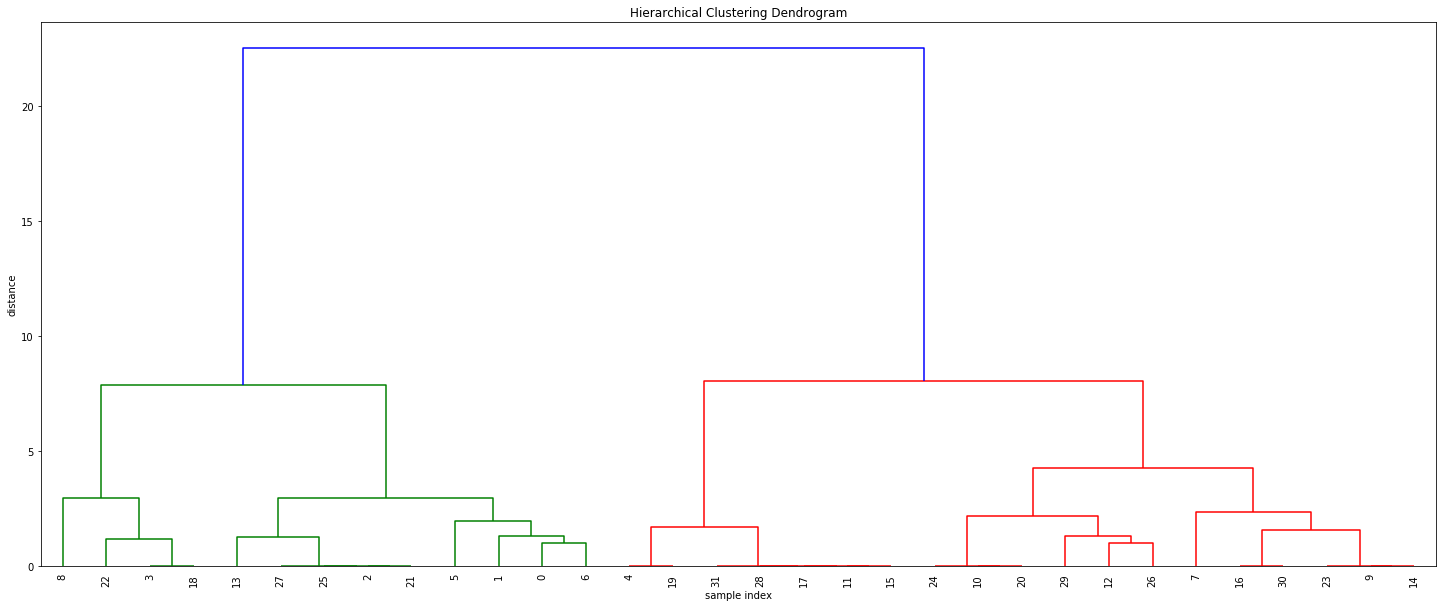

In [66]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
)
plt.show()


In [67]:
Z

array([[ 2.        , 21.        ,  0.        ,  2.        ],
       [ 3.        , 18.        ,  0.        ,  2.        ],
       [ 4.        , 19.        ,  0.        ,  2.        ],
       [25.        , 32.        ,  0.        ,  3.        ],
       [27.        , 35.        ,  0.        ,  4.        ],
       [16.        , 30.        ,  0.        ,  2.        ],
       [ 9.        , 14.        ,  0.        ,  2.        ],
       [23.        , 38.        ,  0.        ,  3.        ],
       [10.        , 20.        ,  0.        ,  2.        ],
       [24.        , 40.        ,  0.        ,  3.        ],
       [11.        , 15.        ,  0.        ,  2.        ],
       [17.        , 42.        ,  0.        ,  3.        ],
       [28.        , 43.        ,  0.        ,  4.        ],
       [31.        , 44.        ,  0.        ,  5.        ],
       [ 0.        ,  6.        ,  1.        ,  2.        ],
       [12.        , 26.        ,  1.        ,  2.        ],
       [22.        , 33.

In [68]:
ybs.T[[2,21]]

array([[3, 2, 3, 3, 1, 2, 3, 1],
       [3, 2, 3, 3, 1, 2, 3, 1]])

In [69]:
y[[2, 21]]

array([[26103.],
       [26149.]])

In [70]:
ybs.T[[3, 18]]

array([[4, 3, 4, 4, 3, 3, 4, 2],
       [4, 3, 4, 4, 3, 3, 4, 2]])

In [71]:
y[[3, 18]]

array([[36163.],
       [38672.]])

Looking at our z matrix, the first time we see an index (idx) larger than len(y) is in step 7 (idx=6 since Python is 0 offset).



In [72]:
Z[6]

array([ 9., 14.,  0.,  2.])

Here we have singleton 23 being merged with cluster index 35. But we only have n=32 states. The question is what cluster is 23 being joined to in this step?

All indices idx > len(X) indicate point to a cluster formered at step idx - len(x).

So:


In [73]:
Z[35 - 32]

array([25., 32.,  0.,  3.])

means that in step 6, the algorithm joins singleton 23 to the cluster  with id 35 composed of (9, 14). Cluster 35 formed in step idx-len(y)=  35-2 = 3.

The new cluster has size 3 and is defined as (9, 14, 23).

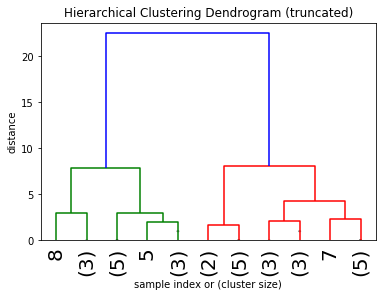

In [74]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=11,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=20.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

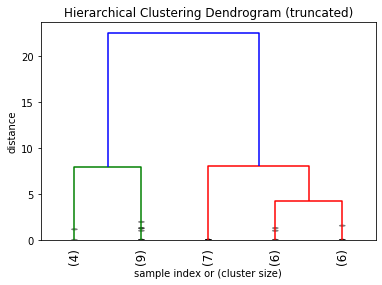

In [75]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [76]:
from scipy.cluster.hierarchy import fcluster
fcluster(Z, 5, criterion='maxclust')

array([2, 2, 2, 1, 3, 2, 2, 5, 1, 5, 4, 3, 4, 2, 5, 3, 5, 3, 1, 3, 4, 2,
       1, 5, 4, 2, 4, 2, 3, 4, 5, 3], dtype=int32)

In [77]:
from scipy.cluster.hierarchy import fcluster
fcluster(Z, 2, criterion='maxclust')

array([1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 2, 2, 2, 2], dtype=int32)

In [78]:
from scipy.cluster.hierarchy import fcluster
fcluster(Z, 7, criterion='maxclust')

array([4, 4, 3, 1, 5, 4, 4, 7, 2, 7, 6, 5, 6, 3, 7, 5, 7, 5, 1, 5, 6, 3,
       1, 7, 6, 3, 6, 3, 5, 6, 7, 5], dtype=int32)